In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
from datetime import datetime
%matplotlib inline

In [2]:
df = pd.read_pickle('all_banks.pkl')
df.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [3]:
df.xs('Close',level=1,axis = 1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [4]:
returns = pd.DataFrame()

In [5]:
ticker_dic = {0:'BAC',2:'C',3:'GS',4:'JPM',5:'MS',6:'WFC'}

for columns in ticker_dic:
    data = df[ticker_dic[columns],'Close']
    returns[ticker_dic[columns]+' Return'] = data

returns = returns.pct_change()

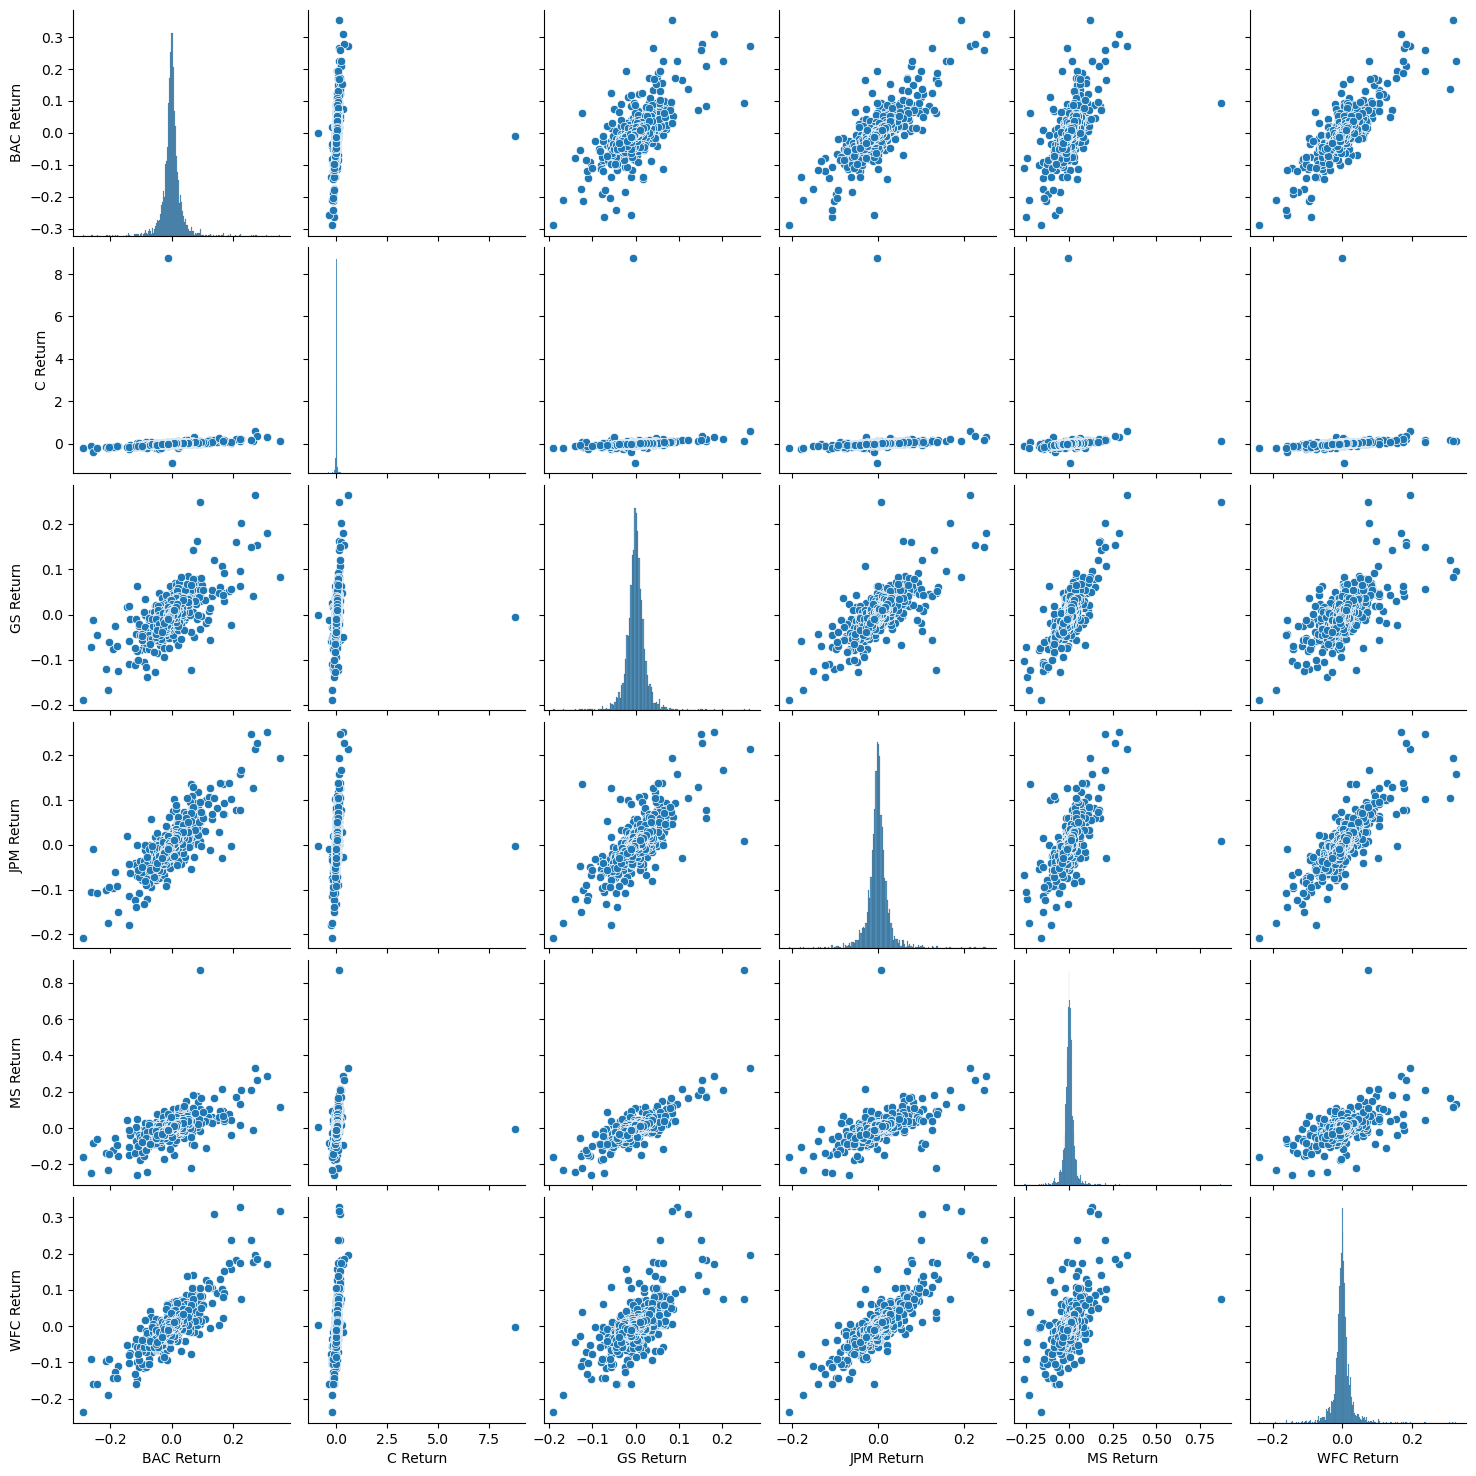

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(returns)

In [7]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [8]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [9]:
returns.std()

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [10]:
returns.xs('2015').std()

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

C:\Users\clyde\AppData\Local\Temp\ipykernel_9680\1752244730.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['MS Return'].xs('2015'),color='green',bins=70).set_ylim(0,45)


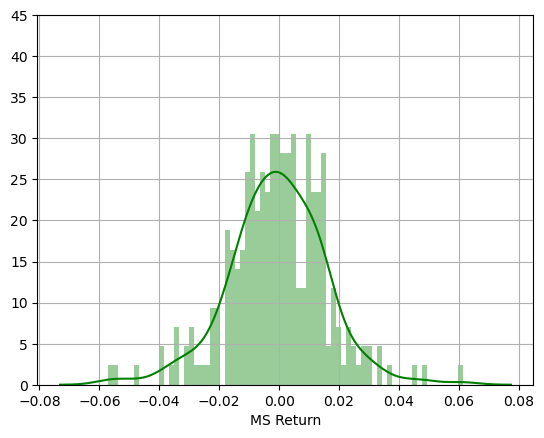

In [11]:
sns.distplot(returns['MS Return'].xs('2015'),color='green',bins=70).set_ylim(0,45)
plt.ylabel('')
plt.grid()

C:\Users\clyde\AppData\Local\Temp\ipykernel_9680\1573875787.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns['C Return'].xs('2008'),color='red',bins=70).set_ylim(0,10)


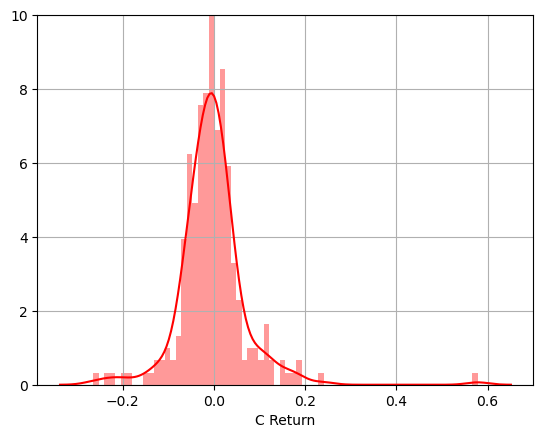

In [12]:
sns.distplot(returns['C Return'].xs('2008'),color='red',bins=70).set_ylim(0,10)
plt.ylabel('')
plt.grid()

In [20]:
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()

In [44]:
close=df.xs('Close',axis=1,level=1)
close.iplot(xTitle='Date',colors=['blue','green','red','purple','gold','lightblue'])

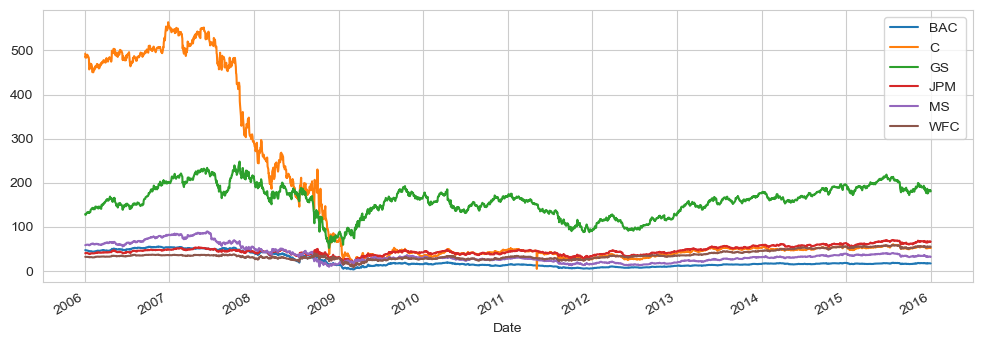

In [48]:
close.plot(figsize=(12,4))
plt.legend()

<Axes: xlabel='Date'>

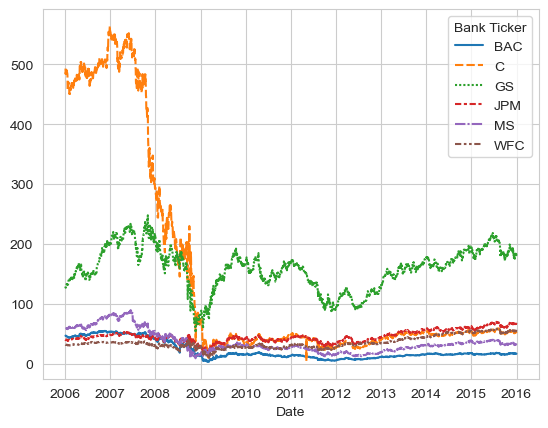

In [49]:
sns.lineplot(close)

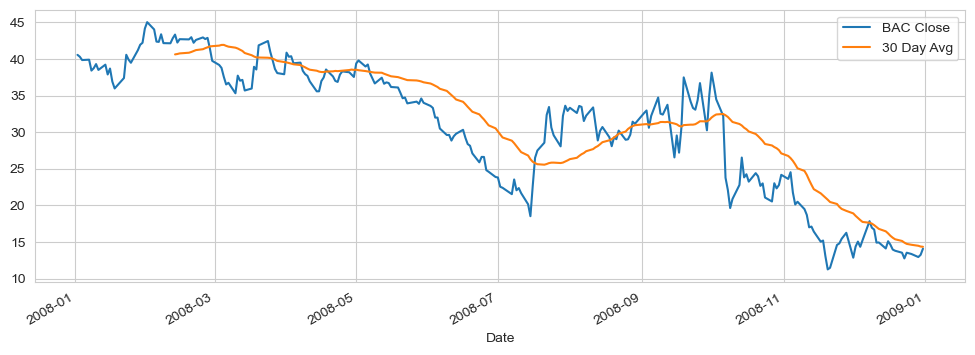

In [90]:
plt.figure(figsize=(12,4))
BAC_close=df.xs(('BAC','Close'),axis=1).xs('2008')
BAC_close.plot(label='BAC Close')
BAC_close.rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

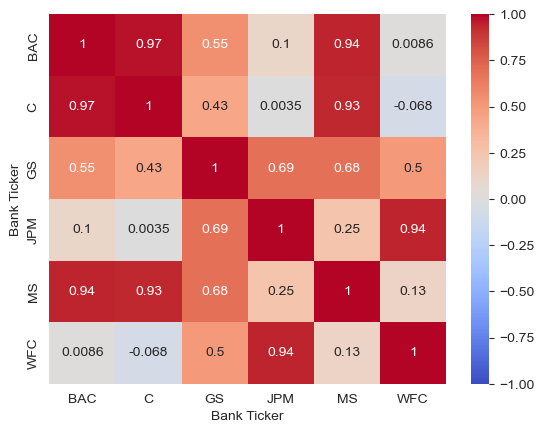

In [121]:
Corr_close=df.xs('Close',level=1,axis=1).corr()
sns.heatmap(Corr_close,annot=True,cmap='coolwarm',vmax=1,vmin=-1)

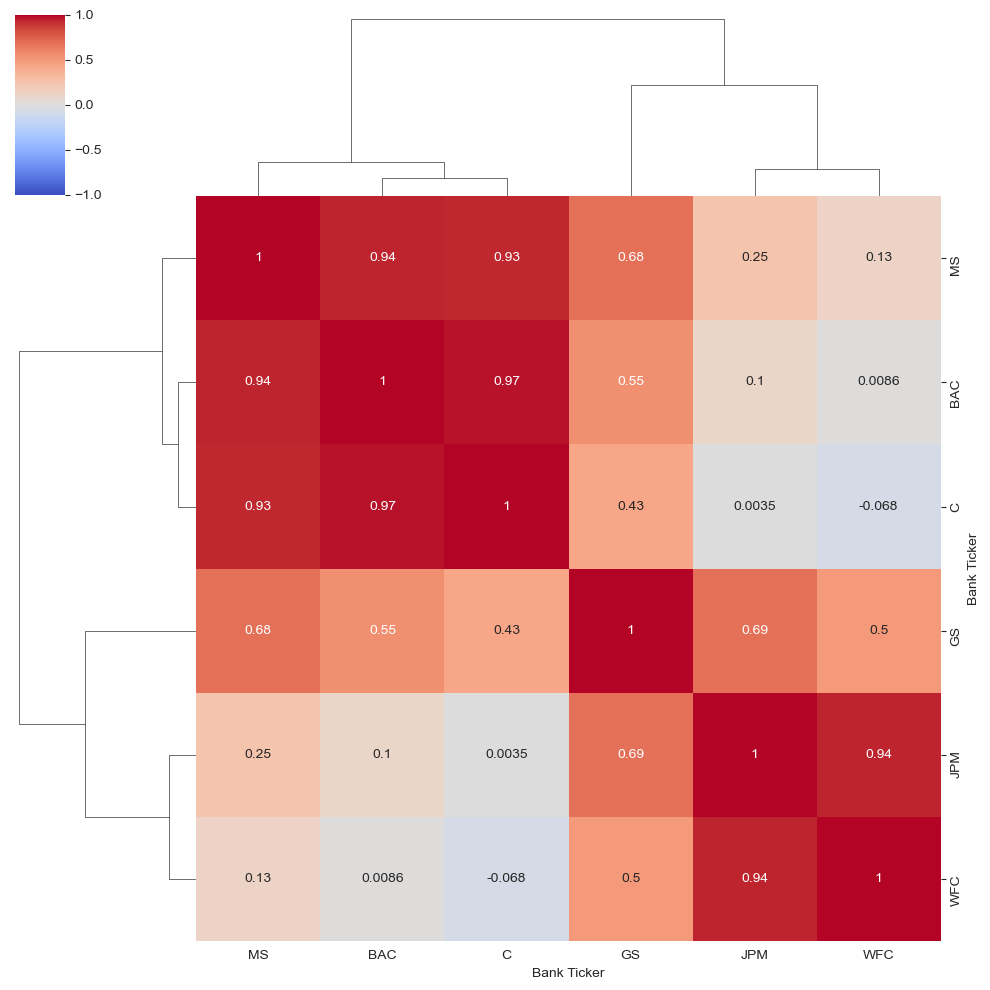

In [122]:
Corr_close=df.xs('Close',level=1,axis=1).corr()
sns.clustermap(Corr_close,annot=True,cmap='coolwarm',vmax=1,vmin=-1)

In [187]:
df['BAC'][['Open','High','Low','Close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [195]:
df.xs('2015').xs(('MS','Close'),axis=1).ta_plot(study='sma',periods=[13,21,55])

In [196]:
df.xs('2015').xs(('BAC','Close'),axis=1).ta_plot(study='boll')